## SVM

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
housing_price = pd.read_csv("kc_house_data.csv")

## 전처리
df_preprocessed = housing_price.drop(["id", "date", "price"], axis = 1)\
.assign(date = pd.to_datetime(housing_price.date)).assign(price = housing_price.price)

## scores recoding
scoring_dict = dict()

In [3]:
def month_days_split(df_train : pd.DataFrame, df_test : pd.DataFrame) :
    """
    train/test set에서 `date` 열을 월별과 일별로 따로 분석하기 위한 함수
    """
    test_month = df_test.date.dt.month.astype(str)
    test_days = df_test.date.map(lambda x : x - df_preprocessed.date.min()).dt.days
    train_month = df_train.date.dt.month.astype(str)
    train_days = df_train.date.map(lambda x : x - df_preprocessed.date.min()).dt.days
    
    return [train_month, train_days], [test_month, test_days]

df_train, df_test = train_test_split(df_preprocessed, test_size = 0.3, shuffle = True, random_state = 14107)
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

train_date, test_date = month_days_split(df_train, df_test)

In [4]:
import matplotlib.pyplot as plt

In [21]:
kfold = KFold(5, random_state=0, shuffle=True)
grid = GridSearchCV(svm_rbf, {'C':[0.1,1,10,100,1000], 'gamma':[0.5,1,2,3,4]}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1000, 'gamma': 4}

In [43]:
best_svm = SVC(kernel="rbf", gamma=4, C=1000)
best_svm.fit(X, y)

SVC(C=1000, gamma=4)

In [ ]:
fig, ax = plt.figure()

disp = DecisionBoundaryDisplay.from_estimator(
        best_svm,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax
)

ax.scatter(X.long, X.lat, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
ax.set_xlim([X.long.min(), X.long.max()])
ax.set_ylim([X.lat.min(), X.lat.max()])
ax.set_title(title)

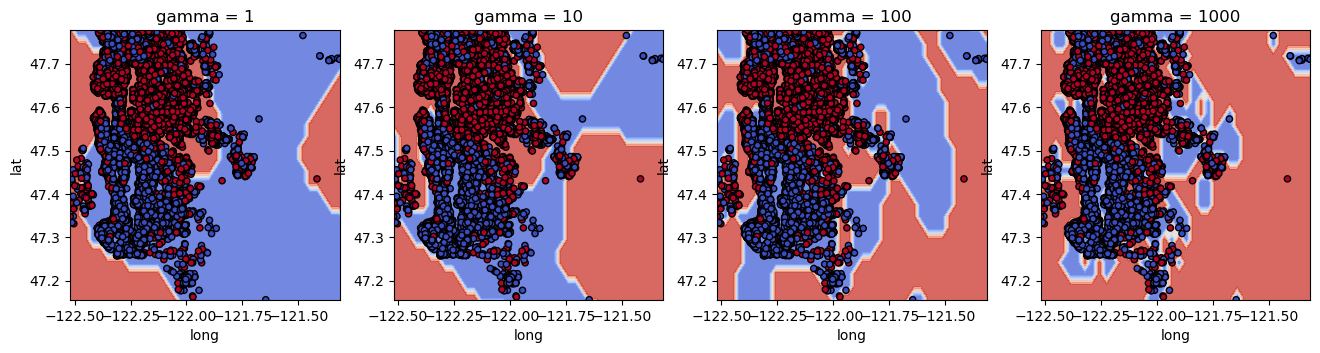

In [13]:
models = [SVC(kernel='rbf', gamma = i, C = 10000) for i in [1, 10, 100, 1000]]
models = [clf.fit(X, y) for clf in models]
gammas = [1, 10, 100, 1000]
titles = [f"gamma = {i}" for i in gammas]

fig, axs = plt.subplots(1, 4, figsize = (16, 3.5))

for clf, title, ax in zip(models, titles, axs.flatten()) :
        disp = DecisionBoundaryDisplay.from_estimator(
                clf,
                X,
                response_method="predict",
                cmap=plt.cm.coolwarm,
                alpha=0.8,
                ax=ax
        )

        ax.scatter(X.long, X.lat, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
        ax.set_xlim([X.long.min(), X.long.max()])
        ax.set_ylim([X.lat.min(), X.lat.max()])
        ax.set_title(title)

Truth,0,1
Predicted,,
0,2450,542
1,769,2723


In [6]:
## 반응변수 구간 분할
X = df_train[["long", "lat"]]
y = df_train.price.map(lambda x : x >= df_train.price.median()).astype(int)

XX = df_test[["long", "lat"]]
yy = df_test.price.map(lambda x : x >= df_train.price.median()).astype(int)

## hyperparameter tuning
svm_rbf = SVC()
kfold = KFold(5, random_state=0, shuffle=True)

grid = GridSearchCV(svm_rbf, {'C': [1000, 5000, 10000], 'gamma': 10**np.linspace(0, 3, 5)}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)

{'C': 10000, 'gamma': 1000.0}

In [17]:
print(f"accuracy = {np.mean(yy == yyhat)}")

accuracy = 0.8386798272671191


In [18]:
best_svm = grid.best_estimator_
yyhat = best_svm.predict(XX)
print(confusion_matrix(yyhat, yy))
print(f"accuracy = {np.mean(yy == yyhat)}")

[[2655  482]
 [ 564 2783]]
accuracy = 0.8386798272671191


In [14]:
yy.sum()

3265

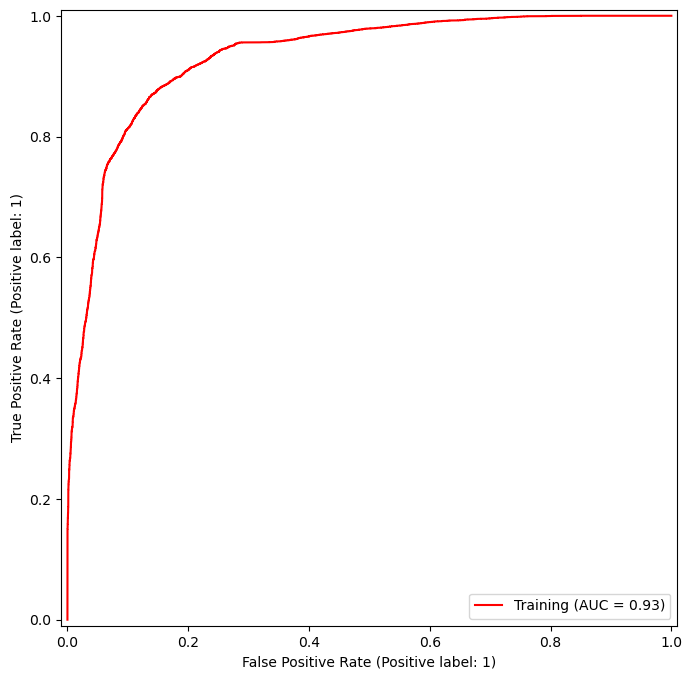

In [19]:
roc_curve = RocCurveDisplay.from_estimator

fig, ax = plt.subplots(figsize=(8,8))
roc_curve(best_svm, X, y, name='Training', color='r', ax=ax)
fig.show()

In [11]:
np.logspace(1, 7, 7)

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07])

범위 너무 욕심부리지 말고, 10만까지만 하자...

In [ ]:
## 반응변수 구간 분할
X = df_train[["long", "lat"]]
y = df_train.price.map(lambda x : x >= df_train.price.median()).astype(int)

XX = df_test[["long", "lat"]]
yy = df_test.price.map(lambda x : x >= df_train.price.median()).astype(int)

## hyperparameter tuning
svm_rbf = SVC()
kfold = KFold(2, random_state=0, shuffle=True)

grid = GridSearchCV(svm_rbf, {'C': np.logspace(1, 6, 6), 'gamma': np.logspace(1, 6, 6)}, refit=True, cv=kfold, scoring='accuracy', verbose = 2)
grid.fit(X, y)

Fitting 2 folds for each of 49 candidates, totalling 98 fits
[CV] END .................................C=10.0, gamma=10.0; total time=   3.2s
[CV] END .................................C=10.0, gamma=10.0; total time=   2.9s
[CV] END ................................C=10.0, gamma=100.0; total time=   2.8s
[CV] END ................................C=10.0, gamma=100.0; total time=   2.6s
[CV] END ...............................C=10.0, gamma=1000.0; total time=   2.7s
[CV] END ...............................C=10.0, gamma=1000.0; total time=   2.7s
[CV] END ..............................C=10.0, gamma=10000.0; total time=   3.9s
[CV] END ..............................C=10.0, gamma=10000.0; total time=   3.8s
[CV] END .............................C=10.0, gamma=100000.0; total time=   7.5s
[CV] END .............................C=10.0, gamma=100000.0; total time=   7.2s
[CV] END ............................C=10.0, gamma=1000000.0; total time=   7.6s
[CV] END ............................C=10.0, gam